In [1]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('ParisHousingClass.csv')
dataset.head()

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0         75523              3        0        1      63      9373   
1         80771             39        1        1      98     39381   
2         55712             58        0        1      19     34457   
3         32316             47        0        0       6     27939   
4         70429             19        1        1      90     38045   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              3              8  2005           0                  1   
1              8              6  2015           1                  0   
2              6              8  2021           0                  0   
3             10              4  2012           0                  1   
4              3              7  1990           1                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price category  
0      4313   9005     956               0             7  7559081.5    Basic  
1      3653   2436     128               1             2  8085989.5   Luxury  
2      2937   8852     135               1             9  5574642.1    Basic  
3       659   7141     359               0             3  3232561.2    Basic  
4      8435   2429     292               1             4  7055052.0   Luxury

In [2]:
# Визуализируем данные

<Axes: >

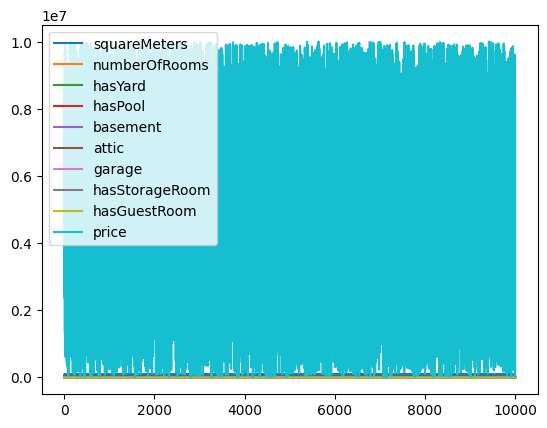

In [3]:
dataset = dataset.drop(columns=['floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector',])
dataset.plot()

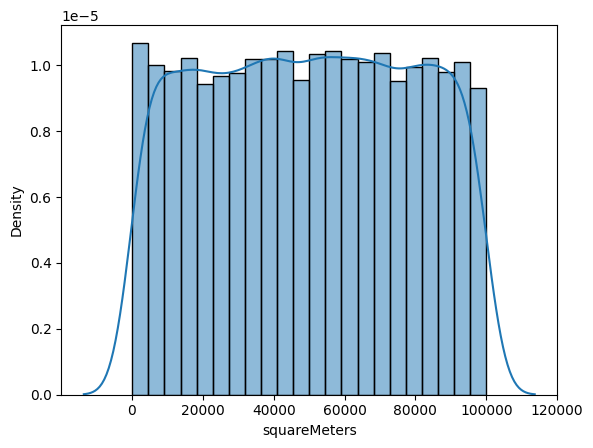

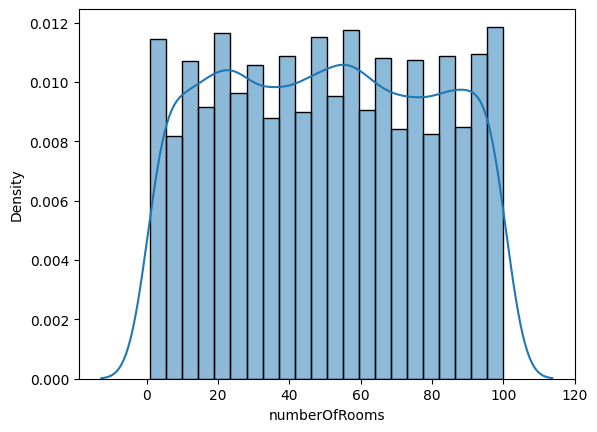

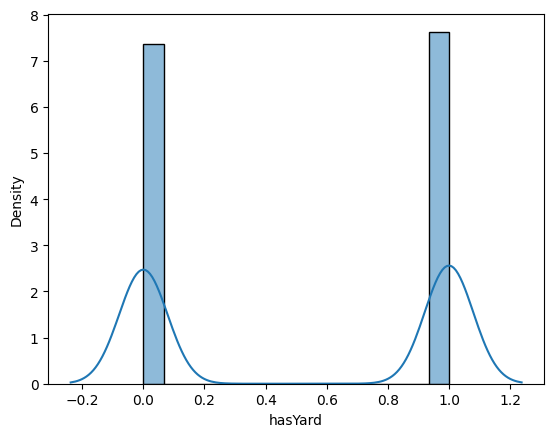

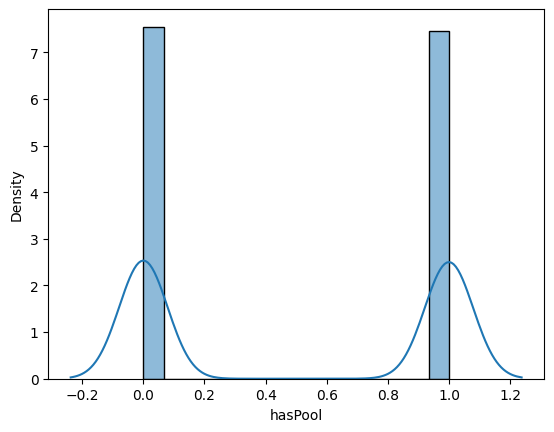

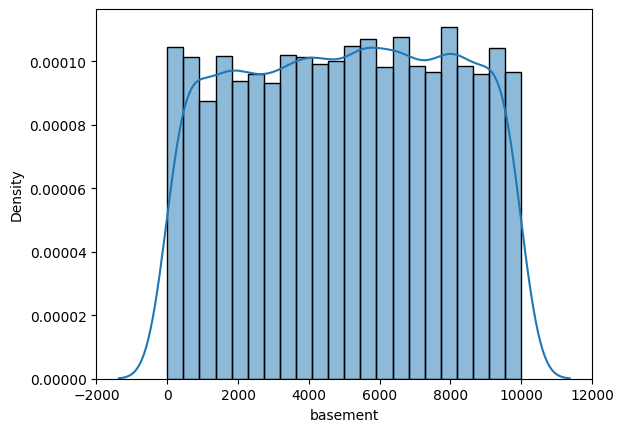

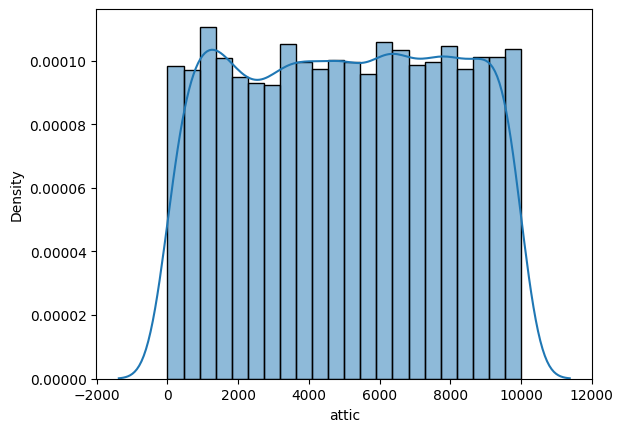

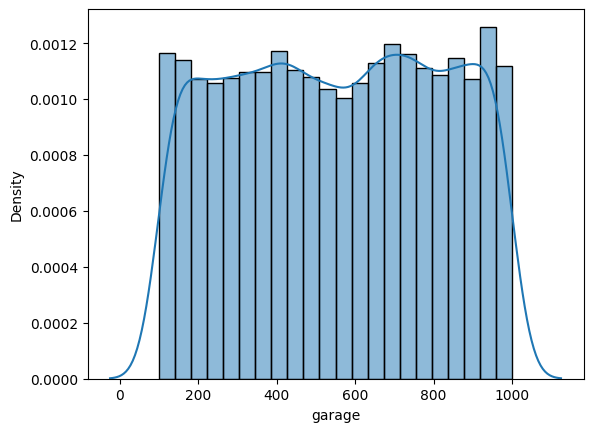

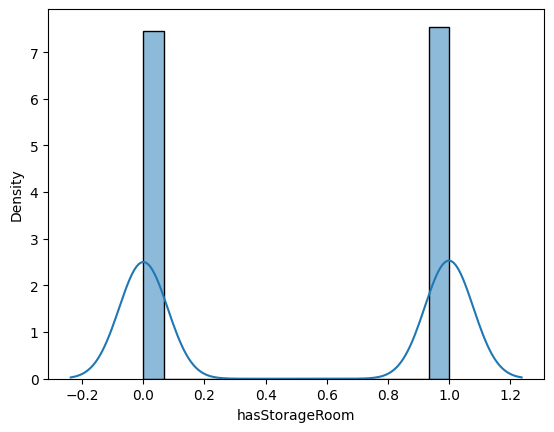

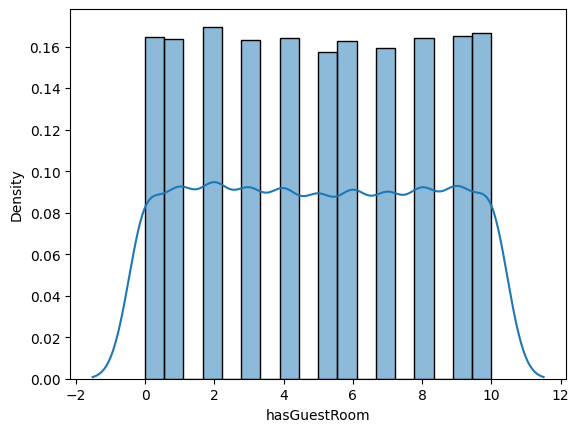

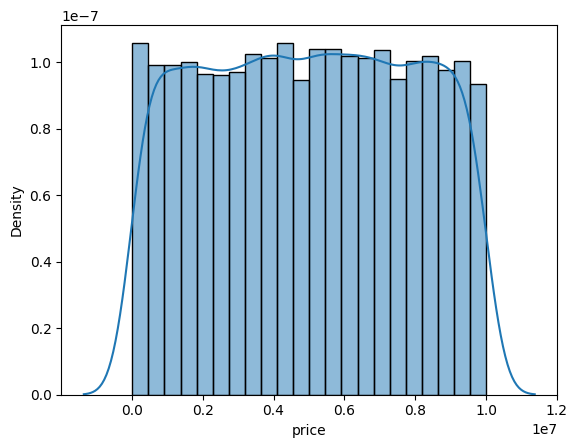

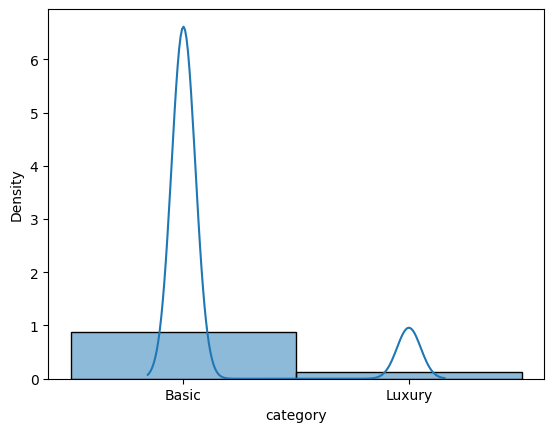

In [4]:
for i, column in enumerate(dataset.columns):
    plt.figure(i)
    sns.histplot(dataset[column], stat='density', kde=True, kde_kws={"cut": 3})
plt.show()

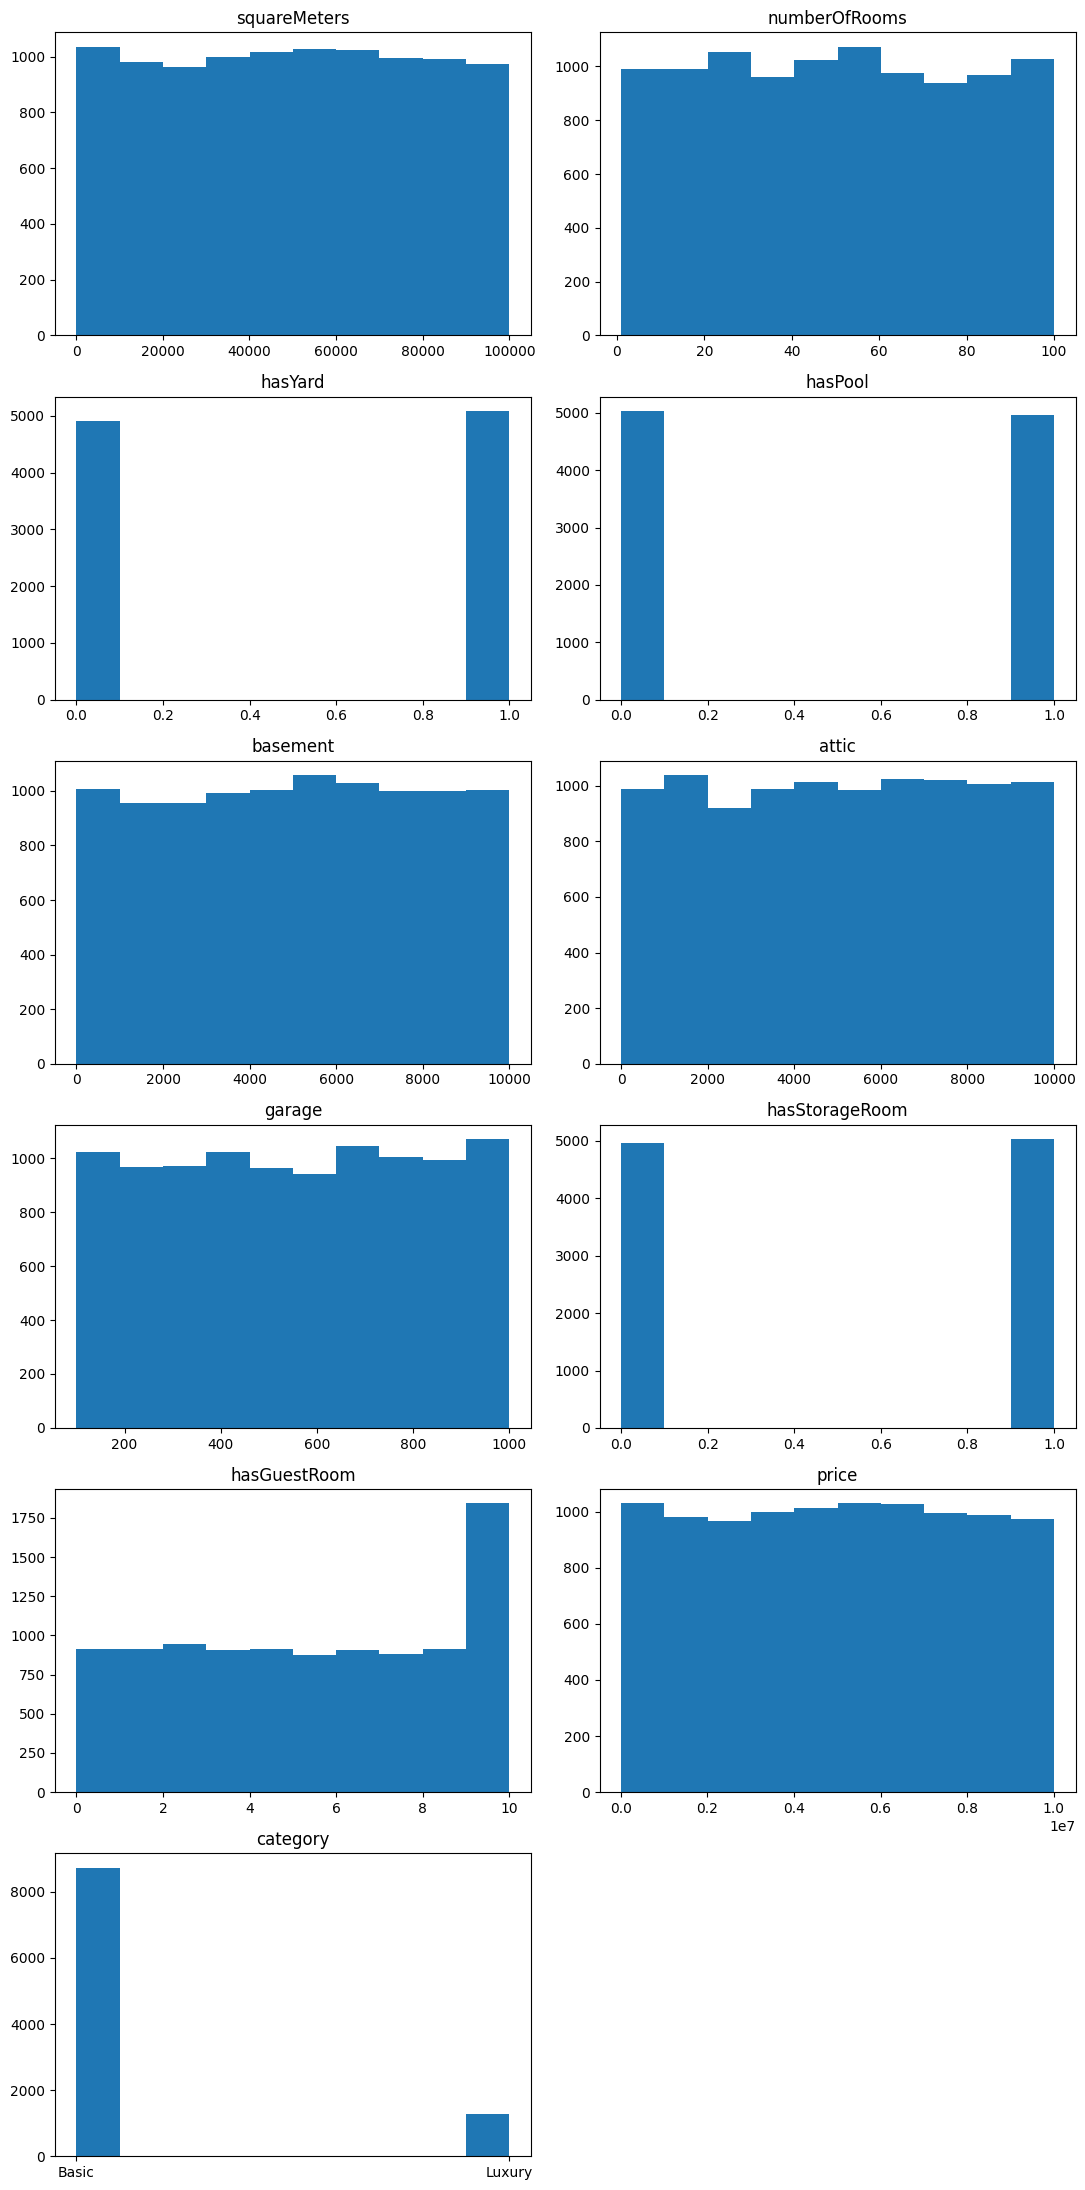

In [5]:
series = dataset.columns
nrows = len(series) // 2 + len(series) % 2  # Add 1 row if the number of series is odd
ncols = 2

f_hist, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(len(series), len(series) * 2))
axes = axes.flatten()

for i, s in enumerate(dataset.columns):
    axes[i].set_title(s)
    axes[i].hist(dataset[s], 10)

    # Если создано больше подзаголовков, чем необходимо, спрячьте пустые
for j in range(len(series), len(axes)):
    f_hist.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

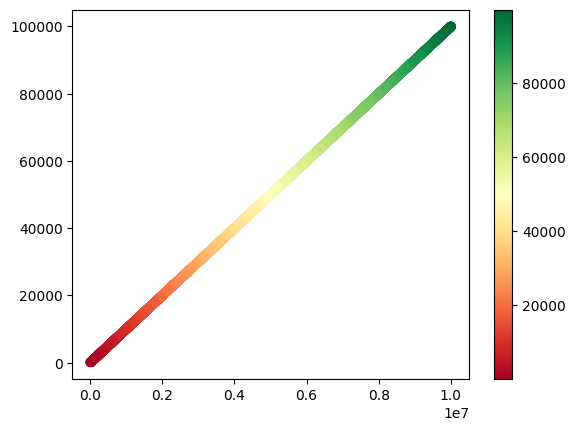

In [6]:
# диаграмма рассеяния
df = dataset
sctr = plt.scatter(x=df['price'], y=df['squareMeters'], c=df['squareMeters'], cmap='RdYlGn')
plt.colorbar(sctr, format='%d')

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, plot, iplot
import plotly.graph_objs as go

df = dataset
fig = go.Figure()
fig.add_trace(go.Box(x=df['price'], boxpoints='all'))
fig.show()

In [8]:

df = dataset
fig = go.Figure()
fig.add_trace(go.Box(x=df['category'], boxpoints='all'))
fig.show()

In [9]:
dataset = pd.read_csv('ParisHousingClass.csv')
# dataset['category'] = pd.Categorical(dataset['category'], categories=['Basic', 'Luxury'], ordered=True).codes
dataset['category'] = dataset['category'].map({'Basic': 0, 'Luxury': 1})
dataset['category']

0       0
1       1
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: category, Length: 10000, dtype: int64

In [10]:
dataset.describe()

squareMeters  numberOfRooms       hasYard       hasPool        floors  \
count   10000.00000   10000.000000  10000.000000  10000.000000  10000.000000   
mean    49870.13120      50.358400      0.508700      0.496800     50.276300   
std     28774.37535      28.816696      0.499949      0.500015     28.889171   
min        89.00000       1.000000      0.000000      0.000000      1.000000   
25%     25098.50000      25.000000      0.000000      0.000000     25.000000   
50%     50105.50000      50.000000      1.000000      0.000000     50.000000   
75%     74609.75000      75.000000      1.000000      1.000000     76.000000   
max     99999.00000     100.000000      1.000000      1.000000    100.000000   

           cityCode  cityPartRange  numPrevOwners         made    isNewBuilt  \
count  10000.000000   10000.000000   10000.000000  10000.00000  10000.000000   
mean   50225.486100       5.510100       5.521700   2005.48850      0.499100   
std    29006.675799       2.872024       2.856667      9.30809      0.500024   
min        3.000000       1.000000       1.000000   1990.00000      0.000000   
25%    24693.750000       3.000000       3.000000   1997.00000      0.000000   
50%    50693.000000       5.000000       5.000000   2005.50000      0.000000   
75%    75683.250000       8.000000       8.000000   2014.00000      1.000000   
max    99953.000000      10.000000      10.000000   2021.00000      1.000000   

       hasStormProtector      basement        attic       garage  \
count       10000.000000  10000.000000  10000.00000  10000.00000   
mean            0.499900   5033.103900   5028.01060    553.12120   
std             0.500025   2876.729545   2894.33221    262.05017   
min             0.000000      0.000000      1.00000    100.00000   
25%             0.000000   2559.750000   2512.00000    327.75000   
50%             0.000000   5092.500000   5045.00000    554.00000   
75%             1.000000   7511.250000   7540.50000    777.25000   
max             1.000000  10000.000000  10000.00000   1000.00000   

       hasStorageRoom  hasGuestRoom         price      category  
count    10000.000000   10000.00000  1.000000e+04  10000.000000  
mean         0.503000       4.99460  4.993448e+06      0.126500  
std          0.500016       3.17641  2.877424e+06      0.332429  
min          0.000000       0.00000  1.031350e+04      0.000000  
25%          0.000000       2.00000  2.516402e+06      0.000000  
50%          1.000000       5.00000  5.016180e+06      0.000000  
75%          1.000000       8.00000  7.469092e+06      0.000000  
max          1.000000      10.00000  1.000677e+07      1.000000

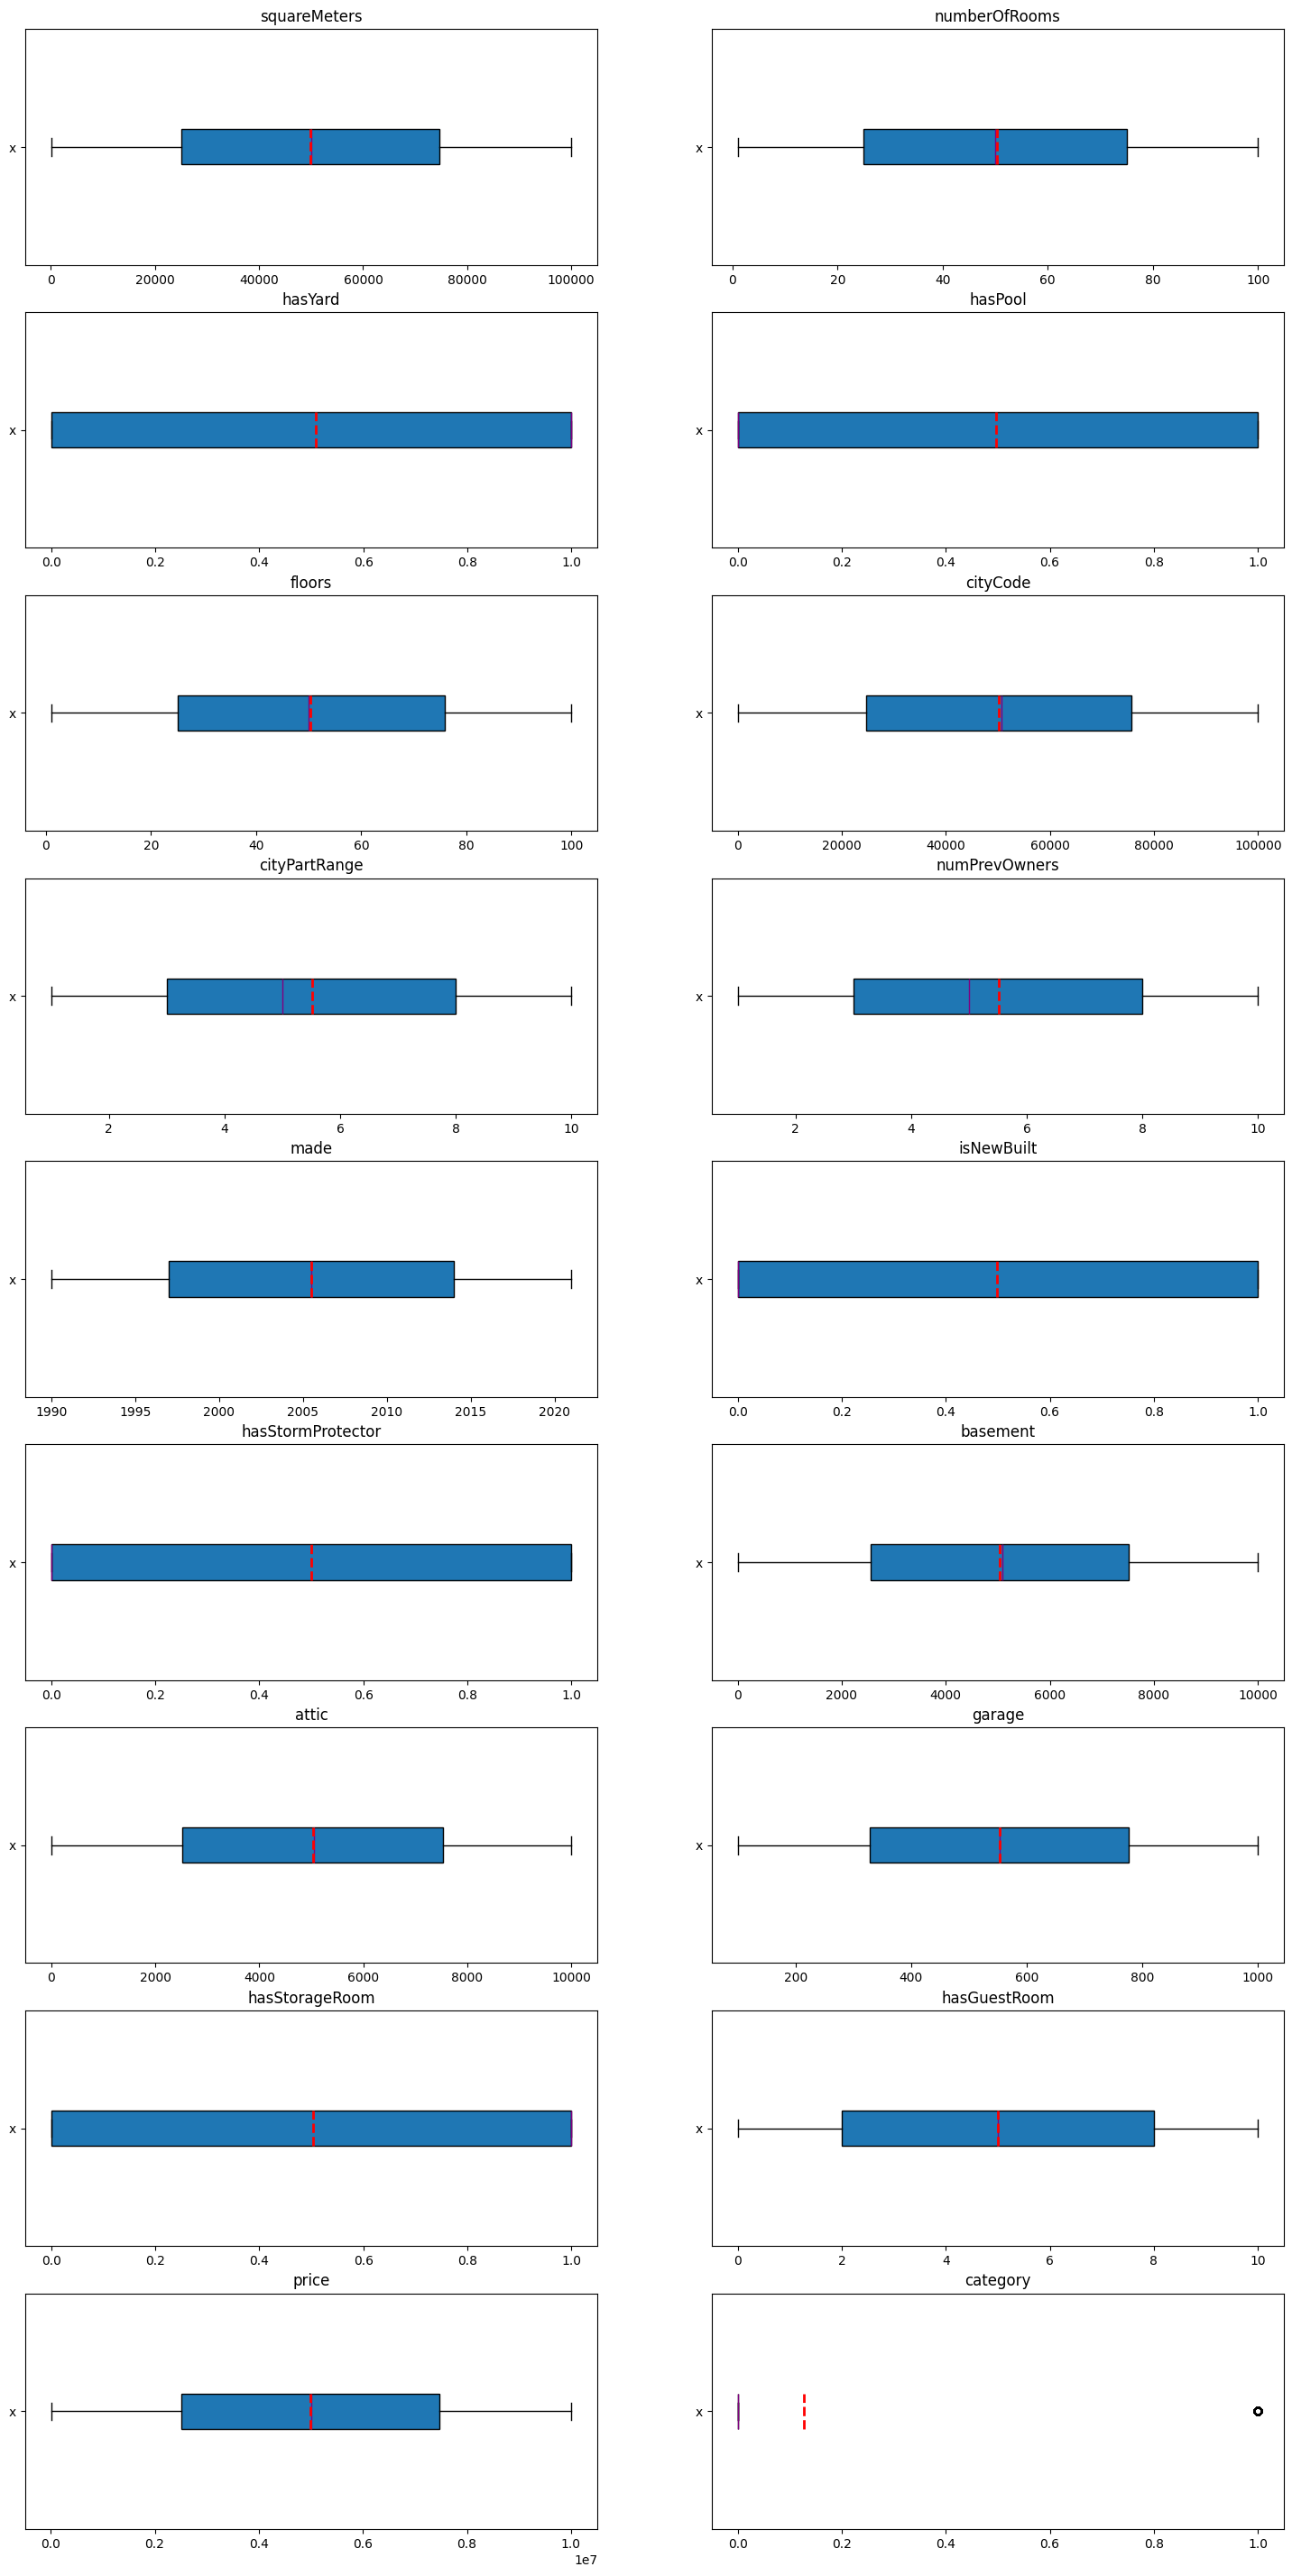

In [11]:
#df['category'] = pd.Categorical(df['category'], categories=['Basic', 'Luxury'], ordered=True).codes
series = dataset.columns
f_hist, axes = plt.subplots(nrows = (len(series) + 1) // 2, ncols = 2, figsize = (len(series), len(series) * 2))
axes = axes.flatten()
for i, s in enumerate(dataset.columns):
    axes[i].set_title(s)
    axes[i].boxplot(x=dataset[s], vert=False, showmeans=True, meanline=True, labels=('x'), patch_artist=True, medianprops={'linewidth': 1, 'color': 'purple'}, meanprops={'linewidth': 2, 'color': 'red'})